#Instalación de las librerías

In [1]:
!pip install pint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 7.0 MB/s eta 0:00:00


In [2]:
pip install modsimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for modsimpy: filename=modsimpy-1.1.3-py3-none-any.whl size=20354 sha256=b943766c6ddc68395216a61bcf70fdab69037baa895e968a7475ab0c90d6d1b5
  Stored in directory: /root/.cache/pip/wheels/3a/21/22/b652cf3a4fc674c3377fdeb77da04bba02954a4ea5abe331be
Successfully built modsimpy


#Modelo poblacional
Vamos a simular con un modelo la obtención de datos históricos de población ya conocidos. Es decir, vamos a ajustar un modelo a estos datos, para obtener las ecuaciones que modelan al sistema.
Al obtener el modelo poblacional podemos llegar a estimar la población en los sgtes. años.
Los datos poblacionales los obtendremos de un artículo de wikipedia acerca de la población mundial.


Importamos las liberías y obtenemos las tablas del artículo

In [3]:
from pandas import read_html
import pandas as pd
import modsim as ms
from matplotlib import pyplot

url = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"

tablas = pd.read_html(url, header=0, index_col=0, decimal='M')

tabla_poblacion = tablas[2] #guardamos en una variable la tercer tabla del artículo

Le modificamos los nombres a las columnas para luego trabar sólo con dos de ellas.

In [4]:
tabla_poblacion.columns = [ 'census' , 'prb' , 'un' , 'maddison' ,'hyde' , 'tanton' , 'biraben' , 'mj' ,'thomlinson' , 'durand' , 'clark' ]

Dividimos los valores de población por 1x10^9 para que nos queden más cómodos para trabajar

In [5]:
censo = tabla_poblacion.census/1e9
un = tabla_poblacion.un/1e9

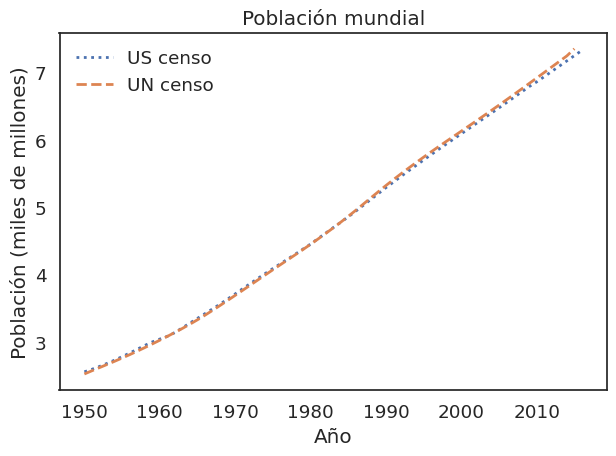

In [6]:
ms.plot(censo, ':', label="US censo")
ms.plot(un, '--', label="UN censo")
ms.decorate(title='Población mundial', xlabel='Año', ylabel='Población (miles de millones)')

## Modelo cuadrático



##Introducción

Vamos a modelar los datos históricos de población con una función cuadrática. La función cuadrática que usaremos es `αx(t) + βx(t)^2 = x(t+1)`. El parámetro beta se agrega al modelo y es un parámetro que se mide distinto a alpha. Además es el parámetro que multiplica a la variable cuadrática, por lo que su valor influye mucho en la ecuación.\
Alpha y beta modifican a la ecuación del modelo de forma diferente y se mantienen constantes para todos los años, es decir, modifican a la curva en su totalidad.\
Definimos una función de actualización cuadrática:

In [7]:
def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    return pop[t] + crecimiento_neto

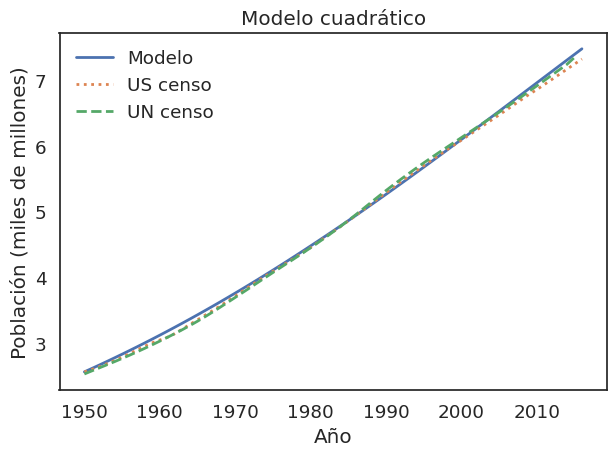

In [8]:
## Función de Simulación

def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    ms.plot(resultado, '-', label="Modelo")
    ms.plot(censo, ':', label="US censo")
    ms.plot(un, '--', label="UN censo")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Población (miles de millones)')


t_0 = ms.get_first_label(censo)
t_end = ms.get_last_label(censo)
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01,
        alpha = 0.025,
        beta = -0.0018)

#sistema.alpha = 0.025
#sistema.beta = -0.0018

res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadrático")

Podríamos encontrar valores de alpha y/o beta que aproximen más la curva, ya sea agregando más decimales de precisión a los parámetros o haciendo un barrido de ellos. 

Podríamos analizar ahora como es el crecimiento de la población año a año, por la gráfica sabemos que es un creciemiento neto positivo. Analizamos si crece más o menos en relación al año anterior. 

In [9]:
def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    print("Año", t,"Población {:.3f} Crecimiento neto {:.4f}".format(pop[t], crecimiento_neto))
    return pop[t] + crecimiento_neto
res = run_simulation(sistema, step_cuadratico)

Año 1950 Población 2.558 Crecimiento neto 0.0522
Año 1951 Población 2.610 Crecimiento neto 0.0530
Año 1952 Población 2.663 Crecimiento neto 0.0538
Año 1953 Población 2.717 Crecimiento neto 0.0546
Año 1954 Población 2.771 Crecimiento neto 0.0555
Año 1955 Población 2.827 Crecimiento neto 0.0563
Año 1956 Población 2.883 Crecimiento neto 0.0571
Año 1957 Población 2.940 Crecimiento neto 0.0579
Año 1958 Población 2.998 Crecimiento neto 0.0588
Año 1959 Población 3.057 Crecimiento neto 0.0596
Año 1960 Población 3.116 Crecimiento neto 0.0604
Año 1961 Población 3.177 Crecimiento neto 0.0613
Año 1962 Población 3.238 Crecimiento neto 0.0621
Año 1963 Población 3.300 Crecimiento neto 0.0629
Año 1964 Población 3.363 Crecimiento neto 0.0637
Año 1965 Población 3.427 Crecimiento neto 0.0645
Año 1966 Población 3.491 Crecimiento neto 0.0653
Año 1967 Población 3.557 Crecimiento neto 0.0661
Año 1968 Población 3.623 Crecimiento neto 0.0669
Año 1969 Población 3.690 Crecimiento neto 0.0677
Año 1970 Población 3

Para entender vamos a crear una arreglo con poblaciones que simulen las nuestras y un arreglo de crecimientos netos calculados con la misma ecuación (cuadrática)



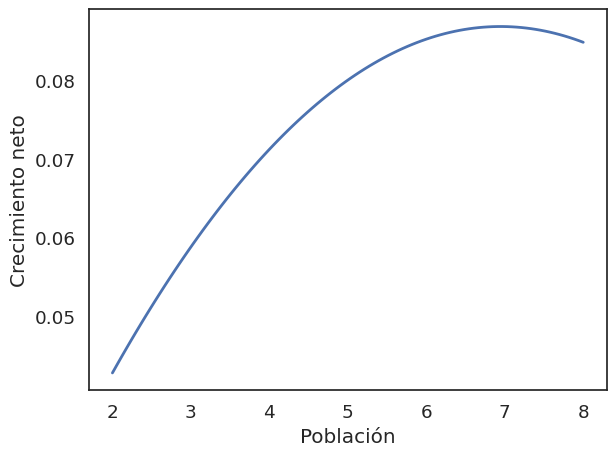

In [10]:
arreglo_pob = ms.linspace(2,8,100) 
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2

ms.plot(arreglo_pob, crecimiento_neto)
ms.decorate(xlabel="Población", ylabel="Crecimiento neto")


aumenta la poblacion hasta que llega al máximo de la parábola y luego empieza a decrecer. Ver gráfico hasta 9 mil millones de habitantes.

Ahora extendamos la poblacion hasta 14 mil millones de hab. 

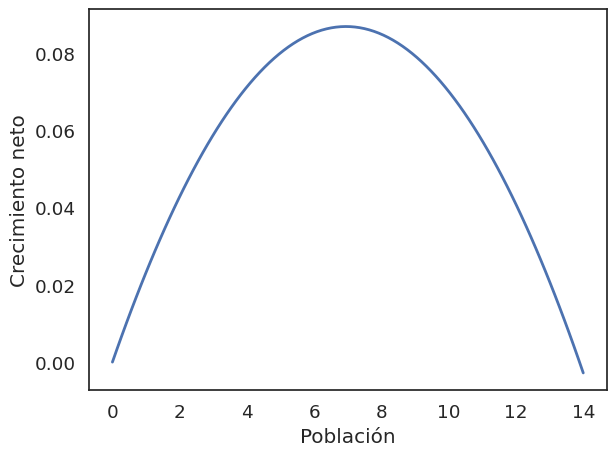

In [11]:
arreglo_pob = ms.linspace(0,14,100) 
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2
ms.plot(arreglo_pob, crecimiento_neto)
ms.decorate(xlabel="Población", ylabel="Crecimiento neto")


Cdo la población llega a 14 mil millones de habitantes es cuando llega a cero. Si tiene un creciemiento cero neto, como será la población al sgte. año?.\
Y si la población supera los 14 mil millones?


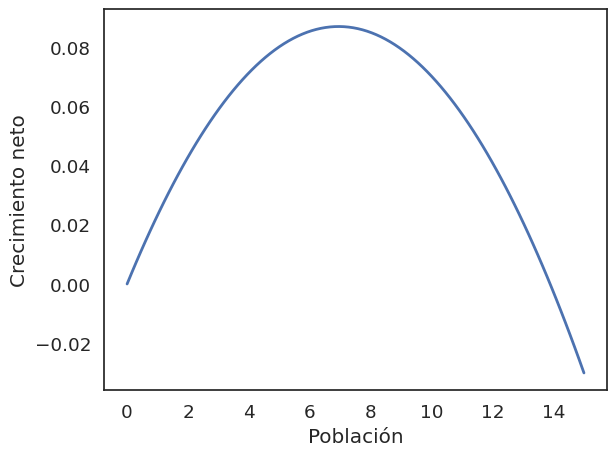

In [12]:
arreglo_pob = ms.linspace(0,15,100) 
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2
ms.plot(arreglo_pob, crecimiento_neto)
ms.decorate(xlabel="Población", ylabel="Crecimiento neto")

El crecimiento neto es negativo. Aumenta la mortalidad y la población se va reduciendo año a año. 

Con ambos gráficos obtenemos más información y podríamos hacer una estimación de los próximos años. Con el segundo (crecimiento neto) podemos observar que en los proximos años va a seguir creciendo la población pero cada vez va a ir creciendo menos hasta que llegue un punto que va a dejar de crecer. Si sigue aumentando probablemente la población se empiece a reducir, esto se ve reflejado en el segundo gráfico en el momento en el que el crecimiento neto es negativo.


Grafiquemos qué pasa en nuestro modelo.

Año 1950 Población 2.558 Crecimiento neto 0.0522
Año 1951 Población 2.610 Crecimiento neto 0.0530
Año 1952 Población 2.663 Crecimiento neto 0.0538
Año 1953 Población 2.717 Crecimiento neto 0.0546
Año 1954 Población 2.771 Crecimiento neto 0.0555
Año 1955 Población 2.827 Crecimiento neto 0.0563
Año 1956 Población 2.883 Crecimiento neto 0.0571
Año 1957 Población 2.940 Crecimiento neto 0.0579
Año 1958 Población 2.998 Crecimiento neto 0.0588
Año 1959 Población 3.057 Crecimiento neto 0.0596
Año 1960 Población 3.116 Crecimiento neto 0.0604
Año 1961 Población 3.177 Crecimiento neto 0.0613
Año 1962 Población 3.238 Crecimiento neto 0.0621
Año 1963 Población 3.300 Crecimiento neto 0.0629
Año 1964 Población 3.363 Crecimiento neto 0.0637
Año 1965 Población 3.427 Crecimiento neto 0.0645
Año 1966 Población 3.491 Crecimiento neto 0.0653
Año 1967 Población 3.557 Crecimiento neto 0.0661
Año 1968 Población 3.623 Crecimiento neto 0.0669
Año 1969 Población 3.690 Crecimiento neto 0.0677
Año 1970 Población 3

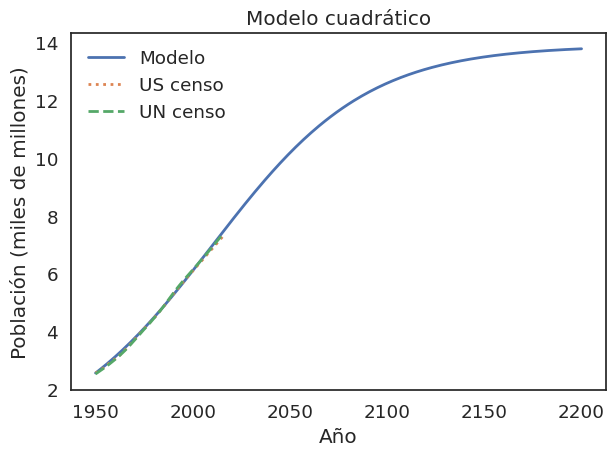

In [13]:
t_0 = ms.get_first_label(censo)
t_end = ms.get_last_label(censo)
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = 2200,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01,
        alpha = 0.025,
        beta = -0.0018)

#sistema.alpha = 0.025
#sistema.beta = -0.0018

res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadrático")

El modelo muestra una asíntota en 14 mil millones de habitantes. Esto demuestra que la población no seguirá aumentando a partir de ese valor. Esto hace referencia a que nos encontramos en un valor de población límite, denominado también, capacidad de carga del modelo, es una estabilización del modelo.

Volvamos a analizar el gráfico del crecimiento neto. A medida que avanzamos en los valores de población (aumenta) el incremento de la población año a año es cada vez menor, ya que se va acercando al valor K, cuando alcanza este valor de población, el creciemiento neto es nulo y es donde vemos el máximo de la parábola, si la población sigue aumentando en su valor, el crecimiento neto empieza a ser negativo y la población empieza a disminuir. 

##Predicciones y proyecciones

Se ejecuta una simulación con el modelo cuadrático proyectando como t_final el año 2250 y luego con t_final el año 2350.


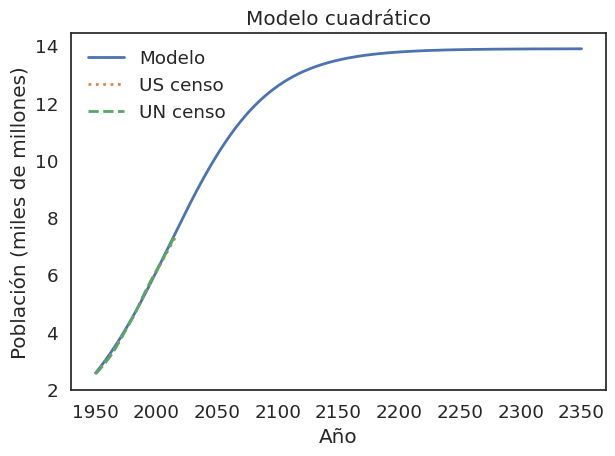

In [14]:
def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    return pop[t] + crecimiento_neto


### Simulación
def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    ms.plot(resultado, '-', label="Modelo")
    ms.plot(censo, ':', label="US censo")
    ms.plot(un, '--', label="UN censo")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Población (miles de millones)')


t_0 = ms.get_first_label(censo)
t_end = ms.get_last_label(censo)
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01)

sistema.alpha = 0.025
sistema.beta = -0.0018
sistema.t_end = 2350

res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadrático")

Según nuestro modelo, en un futuro la población se quedaría en 14 mil millones de habitantes. Se hace asintótica en la capacidad de carga del sistema.

Qué pasa si empezamos con una población mas grande?

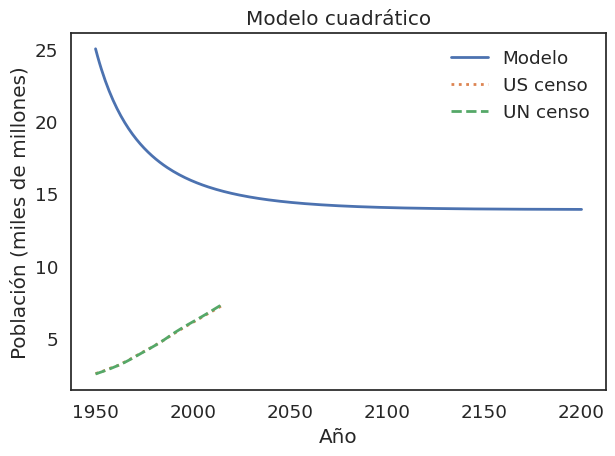

In [15]:
sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01)

sistema.alpha = 0.025
sistema.beta = -0.0018
sistema.t_end = 2200
sistema.p_0 = 25

res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadrático")

Disminuye mas rápidamente cuando el valor de la población es mayor, hasta llegar a cero cerca de los 14 mil millones. Mientras más grande es el valor negativo, más rápido disminuye, hasta que va llegando a un valor donde empieza a disminuir menos y estabilizarse en el valor 13.9 y se queda asintotico. 

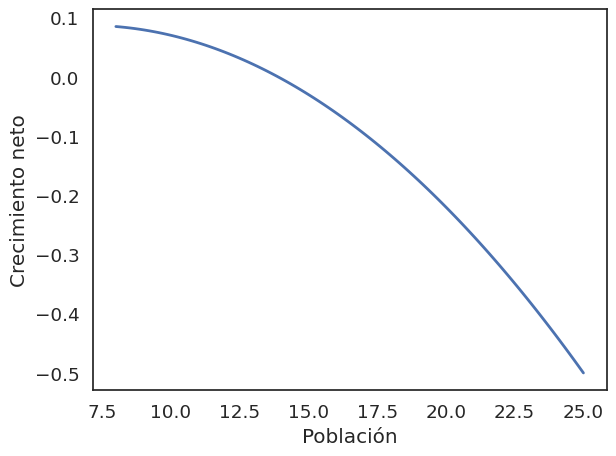

In [16]:
arreglo_pob = ms.linspace(25,8,100) 
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2
ms.plot(arreglo_pob, crecimiento_neto)
ms.decorate(xlabel="Población", ylabel="Crecimiento neto")

La población empieza a disminuir, se reduce año a año, ya que el crecieminto neto es negativo. 

Ejercicio:
Arreglo de poblaciones desde 0 a 30.
cdo la poblacion es menor al inicio crece mas rapidamente que las que empiezan desde un valor mas grande, ya que su incrementeo es menor que antes.


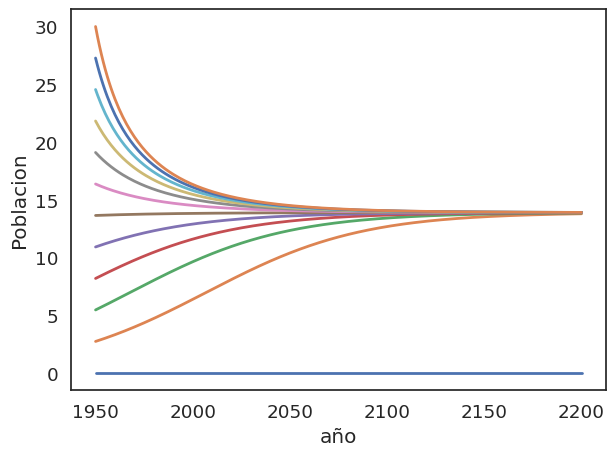

In [17]:
arreglo_pob = ms.linspace(0,30,12)
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2

for sistema.p_0 in arreglo_pob:
    res = run_simulation(sistema, step_cuadratico)
    ms.plot(res)

ms.decorate(xlabel="año", ylabel="Poblacion")

El cero, cdo es cero no crece y se mantiene así.
A medida que aumento la población inicial el crecimiento es menor porque estoy cerca de la capacidad de carga.
La cacapidad de carga se calcula -a/b. Depende de estos valores, por lo tanto no todos los modelos cuadráticos llegan a la misma capacida de carga.

que el crecieminto neto se este reduciendo pueden pasar dos cosas:
o que se este reduciendo la tasa de natalidad o aumente la mortalidad.
hay estimaciones que la tasa d emortalidad no se esta aumentando, al contrario, ha disminuido.
Lo que ha pasado es que la tasa d enatalidad esta disminuyendo.
La estimación hecha a futuro, puede que no sea tan exacta.


Volviendo a nuestra población, que empieza desde 2 mil millones. 

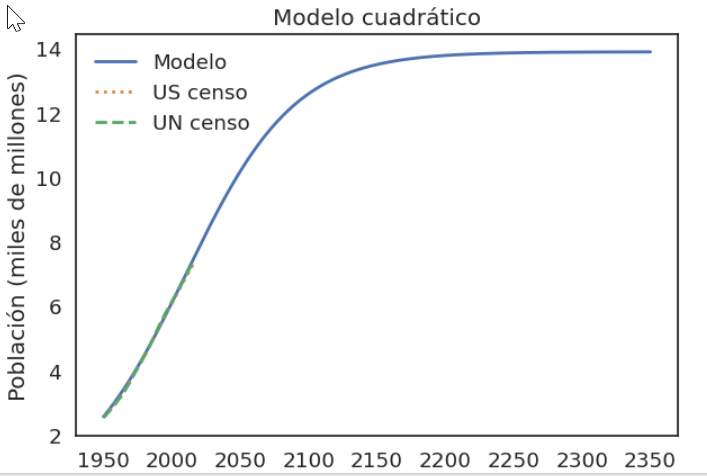

Cuando hacemos que el modelo calcule valores más allá de los históricos, estamos proyectando nuestro modelo a años futuros. Esta es una forma de estimar la población futura.\
Una conclusión que podemos nombrar es que llegaremos a la carga del sistema o a la población límite cerca del año 2150.\
Se habla de *proyeccción del modelo* y no de predicción porque es lo que se espera que ocurra en el futuro si las condiciones actuales se mantienen. Una predicción es algo mas certero y preciso.\
La proyeccción queda abierta a que puedan cambiar las condiciones, nuevos descubrientos, cambien tasas, cambie el ambiente. 
Factores climáticos no estan incluidos.

##Proyecciones de expertos

Desde el artículo de wikipedia analizamos las gráficas de estimaciones.

In [18]:
import pandas as pd

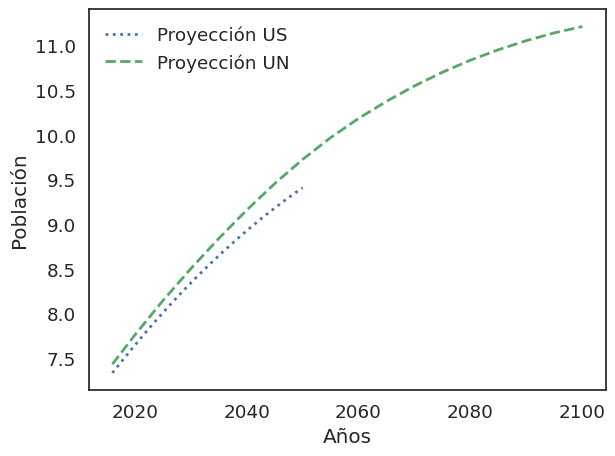

In [19]:
## proyecciones
import pandas as pd
def read_table3(filename = 'https://en.wikipedia.org/w/index.php?title=Estimates_of_historical_world_population&oldid=938127092'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table3 = tables[3]
    table3.columns = ['censo', 'prb', 'un']
    return table3

tabla3 = read_table3()

#print(tabla3)
def plot_projecciones(table):
    censo_proj = table.censo / 1e9
    un_proj = table.un / 1e9

    ms.plot(censo_proj.dropna(), 'b:', label='Proyección US') 
    ms.plot(un_proj.dropna(), 'g--', label='Proyección UN')
    ms.decorate(xlabel="Años", ylabel="Población")

plot_projecciones(tabla3)


In [20]:
print(tabla3)

             censo           prb            un
Year                                          
2016  7.334772e+09           NaN  7.432663e+09
2017  7.412779e+09           NaN           NaN
2018  7.490428e+09           NaN           NaN
2019  7.567403e+09           NaN           NaN
2020  7.643402e+09           NaN  7.758157e+09
2021  7.718257e+09           NaN           NaN
2022  7.792021e+09           NaN           NaN
2023  7.864725e+09           NaN           NaN
2024  7.936272e+09           NaN           NaN
2025  8.006581e+09  8.000000e+09  8.141661e+09
2026  8.075716e+09           NaN           NaN
2027  8.143729e+09           NaN           NaN
2028  8.210560e+09           NaN           NaN
2029  8.276191e+09           NaN           NaN
2030  8.340607e+09  8.505000e+09  8.500766e+09
2031  8.403880e+09           NaN           NaN
2032  8.466094e+09           NaN           NaN
2033  8.527246e+09           NaN           NaN
2034  8.587325e+09           NaN           NaN
2035  8.64630

##Diferencias relativas

Para encontrar un nuevo modelo que nos calcule la población ...

Estimador alpha, permite cambiar la funcion de actualización para que el modelo obtenga mejores resultados.
La diferencias relativas, es la diferencia de un valor con respecto al anterior. La variación, que se puede expresar en porcentaje, del valor anterior con el actual.

Es una medida que se utiliza para comparar dos valores en relación a uno de referencia. De esta manera se encuentra la relación entre ellos.

↪ Diferencia Relativa = (Valor Nuevo - Valor Base) / Valor Base

In [21]:
import numpy as np
lista=[1.0, 2, 1, 2, 1, 2,4, 5, 4, 5, 8]
lista = np.array(lista)
type(lista)

numpy.ndarray

In [22]:
diferencias_relativas = ms.compute_rel_diff(lista,)
print(lista)
print(diferencias_relativas)

[1. 2. 1. 2. 1. 2. 4. 5. 4. 5. 8.]
[ 1.   -0.5   1.   -0.5   1.    1.    0.25 -0.2   0.25  0.6   0.  ]


#### Calcular las DiffR de los datos históricos. 

Calculamos la diferencia relativa para los valores del censo y la diferencia relativa para los valores de las un.\
Obtendremos dos gráficas con el cálculo de las diferencias año a año. 

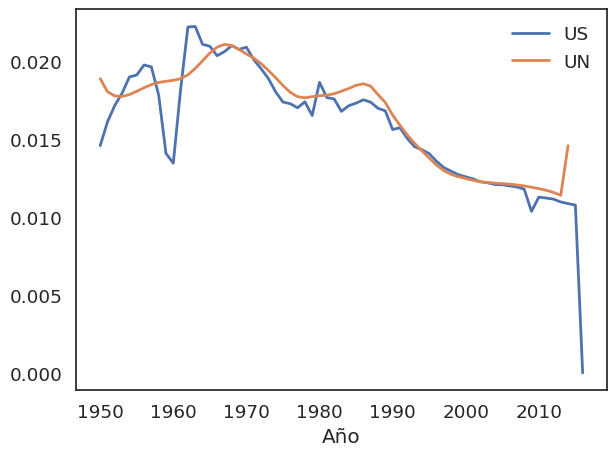

In [23]:
alpha_censo = ms.compute_rel_diff(censo)
ms.plot(alpha_censo, label='US')

alpha_un = ms.compute_rel_diff(un)
ms.plot(alpha_un, label='UN')

ms.decorate(xlabel='Año', label='Tasa de crecimiento neto')

Se observa que no hay mucho cambio entre las dos gráficas, el mayor cambio se ve en los primeros años, pero a partir de 1970 aprox. ya no existe mucha variación entre ellas.\
A partir del cálculo de las diferencias relativas año a año yo podría estimar el sgte. año "desconocido para mi" con este valor.\
 ¿Cómo puedo llegar a cononcer el sgte. valor de diferencia relativa si no tengo la población del 2017?

#### Encontrando patrones dentro de las diferencias relativas - Estimación

Al encontrar un patrón en el gráfico podríamos modelar las curvas para poder calcular el/los años que desconocemos. Así, estimando el sgte. valor de diff relativa podría con el último valor conocido de población calcular el sgte.\
Al observar las gráficas se ve que en el centro a partir de 1970 llegan a formar un patrón, que puede ser una recta. Si continúo con esa recta que los modela, podría decir que en el año 2017 la diff relativa va a ser "x" y podría calcular la población de ese año en base a diffrel y la población anterior.\
De esta manera, obtengo un nuevo modelo de poblaciones, tal como hicimos el modelo, lineal, el proporcional, etc.
Este modelo, basa sus cálculos de las poblaciones en base a las diferencias relativas estimadas con el modelo. 


Simulamos nuestra recta desde 1970, ya que es donde se va mas linealidad en las curvas de diff relativas. La recta tiene pendiente negativa porque es decreciente, y ordenada al origen b.

In [24]:
def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

Graficamos la recta

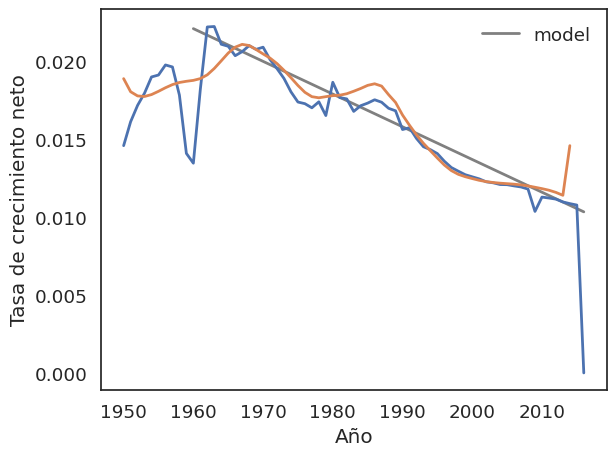

In [25]:
ts = ms.linrange(1960, 2017)
#print(ts)

alpha_model = ms.TimeSeries(recta_alpha(ts), ts)

#print(alpha_model[1975])

ms.plot(alpha_model, color='gray', label='model')
ms.plot(alpha_censo)
ms.plot(alpha_un)
ms.decorate(xlabel='Año', ylabel='Tasa de crecimiento neto')

##### Modelamos la población con la estimación de diff relativas calculadas con la recta alpha

Vamos a crear una nueva función step() que calcule la población en base a un alpha que es la diff relativa. 


las diferenciass relativas se van a acercando a cero a medida que se acercan a la cap maxima del sistema.

In [26]:
def step_alpha_diff(pop, t, sistema):
    crecimiento_neto = recta_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto

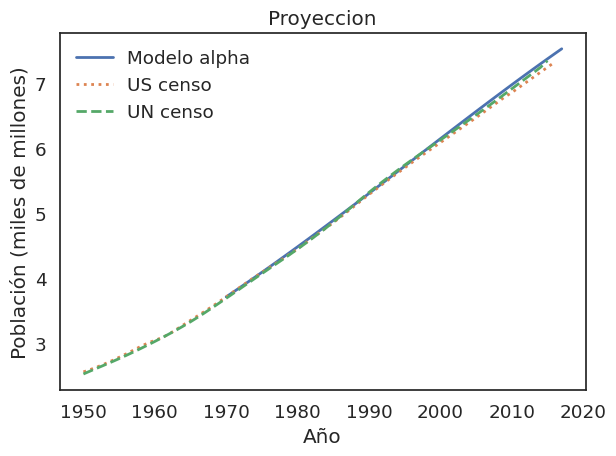

In [27]:
def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

t_0 = 1970
t_end = 2017
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018,
                funcion_alpha=recta_alpha) #en system agregamos la recta 

def step_alphadiff(pop, t, sistema):
    crecimiento_neto = sistema.funcion_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    ms.plot(resultado, '-', label="Modelo alpha")
    ms.plot(censo, ':', label="US censo")
    ms.plot(un, '--', label="UN censo")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Población (miles de millones)')

resultado_alpha = run_simulation(sistema, step_alphadiff)
plot_resultado(censo, un, resultado_alpha, "Proyeccion" )
#ms.plot(resultado_alpha, label="Alpha")
#ms.decorate(xlabel='Año', ylabel ='Población')
#plot_projecciones(tabla3)

Si lo comparamos con el modelo cuadrático

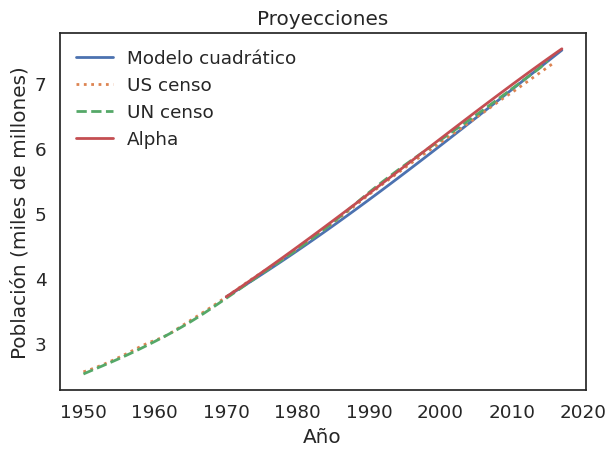

In [28]:
#Calcula las diff relativa de censo US y UN
alpha_censo = ms.compute_rel_diff(censo)
#ms.plot(alpha_censo, label='US')

alpha_un = ms.compute_rel_diff(un)
#ms.plot(alpha_un, label='UN')

#ms.decorate(xlabel='Año', label='Tasa de crecimiento neto')

# Definimos la recta

def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

ts = ms.linrange(1960, 2017)
#print(ts)

alpha_model = ms.TimeSeries(recta_alpha(ts), ts) #guardamos los valores que calcula la recta año a año

#Graficamos la recta, los valores de diff relativa de censo US y UN
#ms.plot(alpha_model, color='gray', label='model')
#ms.plot(alpha_censo)
#ms.plot(alpha_un)
#ms.decorate(xlabel='Año', ylabel='Tasa de crecimiento neto')

t_0 = 1970
t_end = 2017
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018,
                funcion_alpha=recta_alpha) #en system agregamos la recta 

def step_alphadiff(pop, t, sistema):
    crecimiento_neto = sistema.funcion_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto


def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    ms.plot(resultado, '-', label="Modelo cuadrático")
    ms.plot(censo, ':', label="US censo")
    ms.plot(un, '--', label="UN censo")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Población (miles de millones)')


resultado_cuad = run_simulation(sistema, step_cuadratico)
resultado_alpha = run_simulation(sistema, step_alphadiff)
# y graficamos los resultados
plot_resultado(censo, un, resultado_cuad, 'Proyecciones')
ms.plot(resultado_alpha, label="Alpha")
ms.decorate(xlabel='Año')
#plot_projecciones(tabla3)

####Estimación de población a partir de diferencias relativas

Resumen: Creamos una lista de todos los años en los que tenemos datos históricos y los que queremos proyectar. Luego simulo las diferencias relativas con una recta. Esto nos devuelve valores que almacenamos en un objeto TimeSeries y obtenemos para cada año cual es la diff relativa con respecto al año anterior.\
Luego, utilizamos la recta para el cálculo de la nueva población. La sgte. población será la poblacion actual mas un creciemiento neto, que va a estar dado por la poblacion multiplicada por una diff relativa calculada por la recta.

###Proyecciones de expertos vs las nuestras 😲

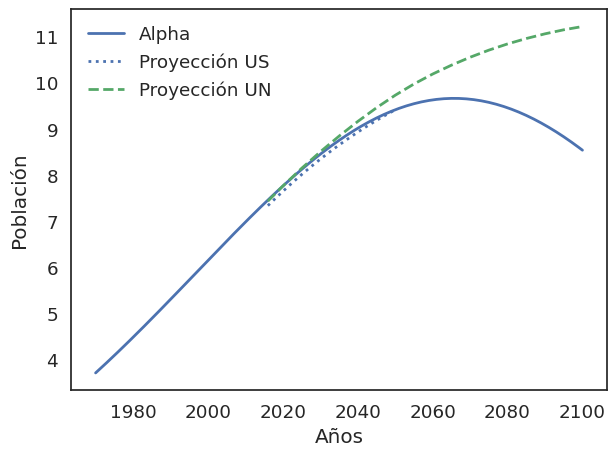

In [35]:
# Definimos la recta

def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

ts = ms.linrange(1960, 2100)
#print(ts)

alpha_model = ms.TimeSeries(recta_alpha(ts), ts) #guardamos los valores que calcula la recta año a año

t_0 = 1970
t_end = 2100
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018,
                funcion_alpha=recta_alpha) #en system agregamos la recta 

def step_alphadiff(pop, t, sistema):
    crecimiento_neto = sistema.funcion_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado


resultado_alpha = run_simulation(sistema, step_alphadiff)
ms.plot(resultado_alpha, label="Alpha")
ms.decorate(xlabel='Año')
plot_projecciones(tabla3)

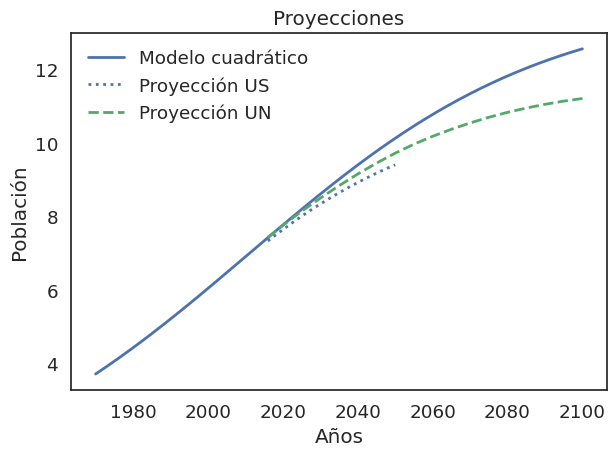

In [30]:
#CUADRÁTICO
t_0 = 1970
t_end = 2100
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018) #en system agregamos la recta 


def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(resultado, titulo):
    ms.plot(resultado, '-', label="Modelo cuadrático")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Población (miles de millones)')


resultado_cuad = run_simulation(sistema, step_cuadratico)
plot_resultado(resultado_cuad, 'Proyecciones')
plot_projecciones(tabla3)

El objetivo es plantear/encontrar un modelo que se ajuste bien a los datos históricos para después poder proyectar.


#Ejercicio: 
graficar en un mismo gráfico las tres curvas de proyecciones, el modelo cuadrático, el modelo alpha y los datos de los expertos. Además, deben visualizarse los datos hitóricos. Responder teniendo en cuenta las poroyecciones de los expertos: 

1.    ¿Cuál será el mejor modelo* para estimar poblaciones en el año 2050? 
2.    ¿Cuál será el mejor modelo* para estimar poblaciones en el año 2100? 

*hace referencia a uno de los que nosotros programamos.

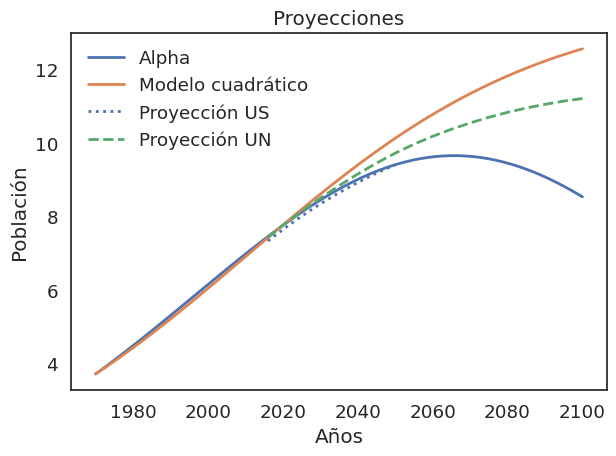

In [38]:
def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

ts = ms.linrange(1970, 2100)
#print(ts)

alpha_model = ms.TimeSeries(recta_alpha(ts), ts) #guardamos los valores que calcula la recta año a año

t_0 = 1970
t_end = 2100
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018,
                funcion_alpha=recta_alpha) #en system agregamos la recta 

def step_alphadiff(pop, t, sistema):
    crecimiento_neto = sistema.funcion_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado


resultado_alpha = run_simulation(sistema, step_alphadiff)
ms.plot(resultado_alpha, label="Alpha")
ms.decorate(xlabel='Año')

resultado_cuad = run_simulation(sistema, step_cuadratico)
plot_resultado(resultado_cuad, 'Proyecciones')
plot_projecciones(tabla3)

`Como se puede ver, el modelo alpha se ajusta mejor a los datos historicos a corto y mediano plazo, por lo que para estimar la poblacion del año 2050 seria la mejor opcion para estimar la poblacion. En el caso de la poblacion del año 2100 podemos ver que el modelo cuadratico seria la mejor opcion para realizar una estimacion. `

#Análisis matemático